In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
wear=pd.read_csv('BearingWear.csv')
wear

,Load,Wear
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


<AxesSubplot:xlabel='Load', ylabel='Wear'>

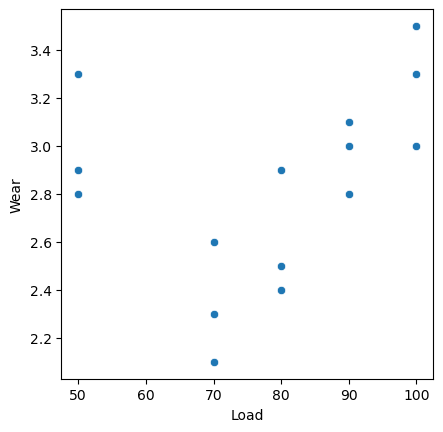

In [5]:
fig=plt.figure(figsize=plt.figaspect(1)*1)
ax=fig.add_subplot(111)
sns.scatterplot(x="Load", y="Wear",data=wear)

<AxesSubplot:xlabel='Load', ylabel='Wear'>

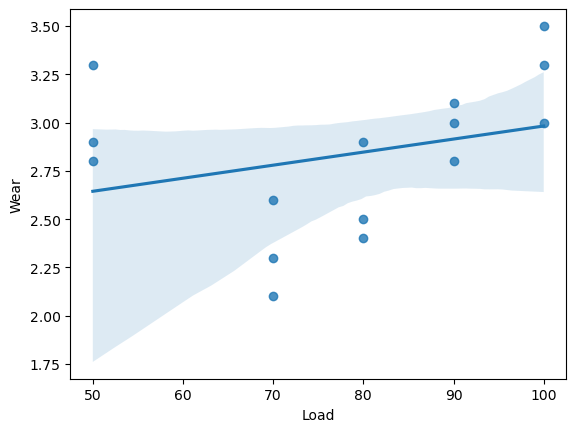

In [6]:
sns.regplot(x="Load",y="Wear",data=wear)

In [7]:
#fit the simple linear regression model with a transformation
modelT=ols('Wear~np.power(Load,5)',data=wear)
resultsT=modelT.fit()
print(resultsT.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.242  
Dependent Variable: Wear             AIC:                12.4675
Date:               2023-06-26 16:08 BIC:                13.8836
No. Observations:   15               Log-Likelihood:     -4.2338
Df Model:           1                F-statistic:        5.462  
Df Residuals:       13               Prob (F-statistic): 0.0361 
R-squared:          0.296            Scale:              0.11880
----------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
----------------------------------------------------------------
Intercept           2.5766   0.1414 18.2244 0.0000 2.2712 2.8820
np.power(Load, 5)   0.0000   0.0000  2.3370 0.0361 0.0000 0.0000
----------------------------------------------------------------
Omnibus:            0.252      Durbin-Watson:         1.435     
Prob(Omnibus):      0.882      Jarque-Bera

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<AxesSubplot:xlabel='Load', ylabel='Wear'>

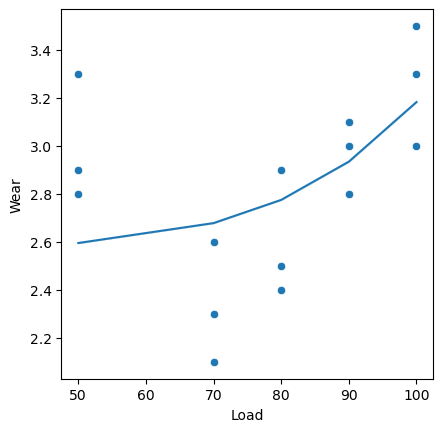

In [8]:
fig=plt.figure(figsize=plt.figaspect(1)*1)
ax=fig.add_subplot(111)
sns.lineplot(x=wear["Load"],y=resultsT.fittedvalues.values)
#sns.regplot(x=wear["Load"],y=wear["Wear"],order=2,data=wear,color="red",ci=None)
sns.scatterplot(x=wear["Load"],y=wear["Wear"],data=wear)

In [9]:
#fit the simple linear regression model
model1=ols('Wear~Load',data=wear)
results1=model1.fit()
print(results1.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.023  
Dependent Variable: Wear             AIC:                16.2742
Date:               2023-06-26 16:08 BIC:                17.6903
No. Observations:   15               Log-Likelihood:     -6.1371
Df Model:           1                F-statistic:        1.324  
Df Residuals:       13               Prob (F-statistic): 0.271  
R-squared:          0.092            Scale:              0.15313
------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
------------------------------------------------------------------
Intercept   2.3063     0.4691   4.9167   0.0003    1.2929   3.3197
Load        0.0068     0.0059   1.1506   0.2706   -0.0059   0.0194
----------------------------------------------------------------
Omnibus:              0.182        Durbin-Watson:          1.267
Prob(Omnibus):        0.913     

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


eval_env: 1


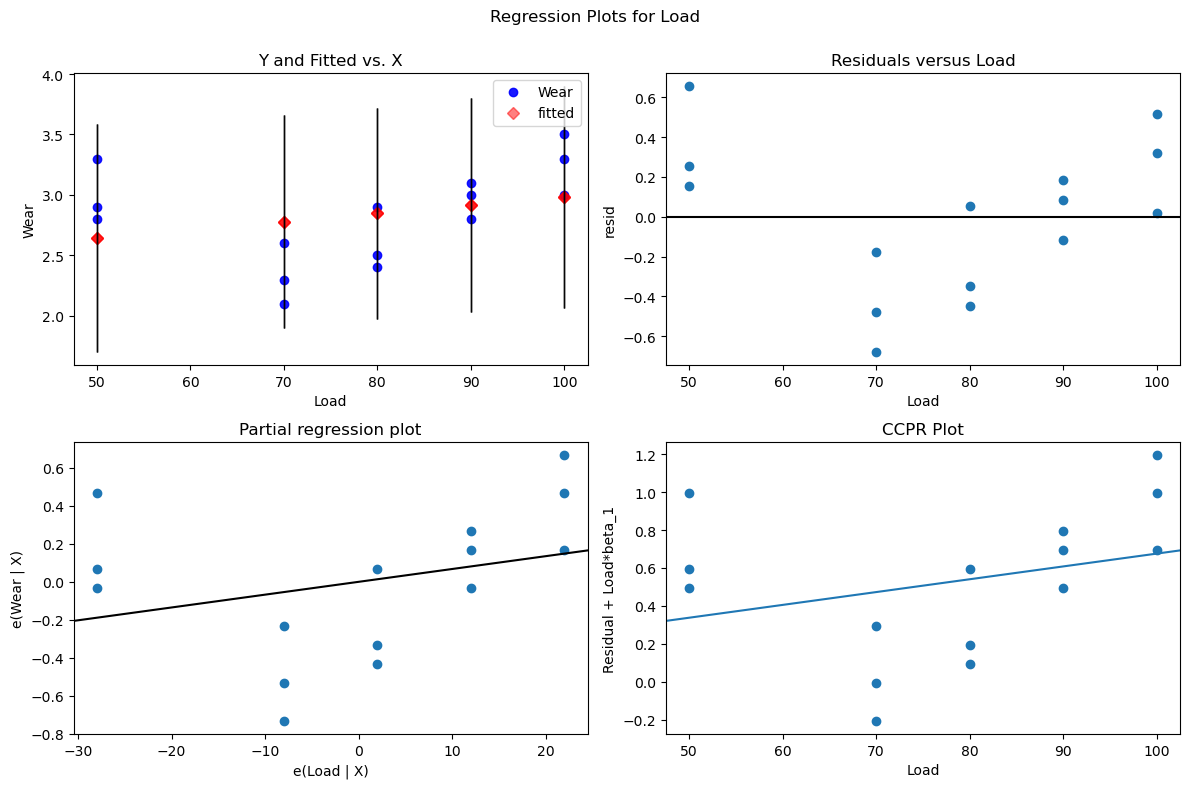

In [10]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results1,'Load',fig=fig)

In [11]:
#fit another predictor to the model: multiple variable regression with polynomial term
model2=ols('Wear~Load+I(Load*Load)',data=wear)
results2=model2.fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.619   
Dependent Variable: Wear             AIC:                2.9524  
Date:               2023-06-26 16:08 BIC:                5.0765  
No. Observations:   15               Log-Likelihood:     1.5238  
Df Model:           2                F-statistic:        12.36   
Df Residuals:       12               Prob (F-statistic): 0.00122 
R-squared:          0.673            Scale:              0.059731
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          7.9605   1.2589  6.3233 0.0000  5.2175 10.7034
Load              -0.1537   0.0349 -4.3992 0.0009 -0.2298 -0.0776
I(Load * Load)     0.0011   0.0002  4.6181 0.0006  0.0006  0.0016
-----------------------------------------------------------------
Omnibus:               0.61

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
#fit another predictor to the model: with cubic term
model3=ols('Wear~Load+I(Load*Load)+I(Load*Load*Load)',data=wear)
results3=model3.fit()
print(results3.summary2())

                   Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.663   
Dependent Variable:   Wear              AIC:                 1.7822  
Date:                 2023-06-26 16:08  BIC:                 4.6144  
No. Observations:     15                Log-Likelihood:      3.1089  
Df Model:             3                 F-statistic:         10.19   
Df Residuals:         11                Prob (F-statistic):  0.00166 
R-squared:            0.735             Scale:               0.052747
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
Intercept             21.0516   8.2219  2.5604 0.0265  2.9552 39.1479
Load                  -0.7143   0.3500 -2.0411 0.0660 -1.4845  0.0560
I(Load * Load)         0.0088   0.0048  1.8321 0.0941 -0.0018  0.0193
I(Load * Load * Load) -0.0000   0.0000 

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [13]:
#transform the predcitor into a polynomial term and add it to the dataframe
wearpolyxx=(wear["Load"]*wear["Load"])  
wearpolyx=(7.96-0.1537*wear["Load"]+0.001076*wearpolyxx)
wear["wearpolyxx"]=wearpolyxx
wear["wearpolyx"]=wearpolyx
wear

,Load,Wear,wearpolyxx,wearpolyx
0,50,3.3,2500,2.9650
1,50,2.8,2500,2.9650
2,50,2.9,2500,2.9650
3,70,2.3,4900,2.4734
4,70,2.6,4900,2.4734
5,70,2.1,4900,2.4734
6,80,2.5,6400,2.5504
7,80,2.9,6400,2.5504
8,80,2.4,6400,2.5504
9,90,3.0,8100,2.8426


In [14]:
results2.fittedvalues.values

array([2.96391753, 2.96391753, 2.96391753, 2.47113402, 2.47113402,
       2.47113402, 2.54742268, 2.54742268, 2.54742268, 2.83883162,
       2.83883162, 2.83883162, 3.34536082, 3.34536082, 3.34536082])

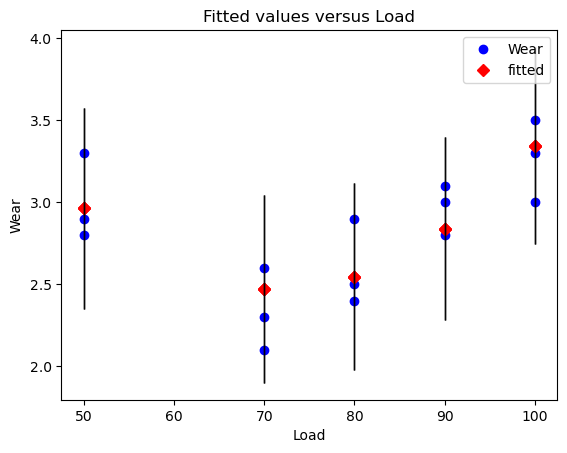

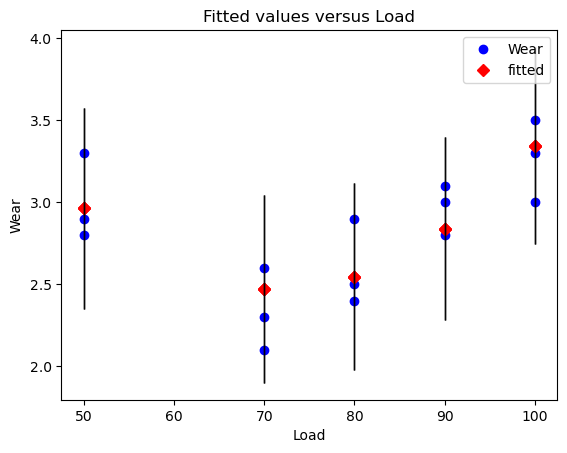

In [15]:
sm.graphics.plot_fit(results2, "Load")

<AxesSubplot:xlabel='Load', ylabel='Wear'>

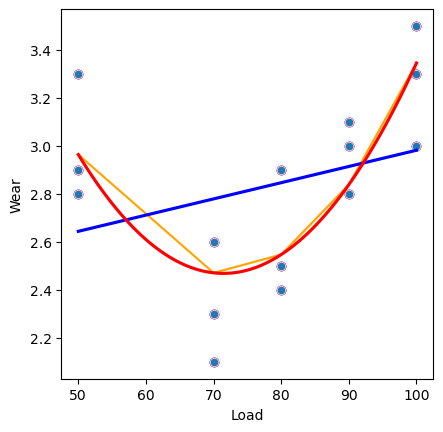

In [16]:
fig=plt.figure(figsize=plt.figaspect(1)*1)
ax=fig.add_subplot(111)
sns.lineplot(x=wear["Load"],y=results2.fittedvalues.values,color="orange")
sns.regplot(x=wear["Load"],y=wear["Wear"],order=1,data=wear,color="blue",ci=None)
sns.regplot(x=wear["Load"],y=wear["Wear"],order=2,data=wear,color="red",ci=None)
sns.scatterplot(x=wear["Load"],y=wear["Wear"],data=wear)

<AxesSubplot:xlabel='Load', ylabel='Wear'>

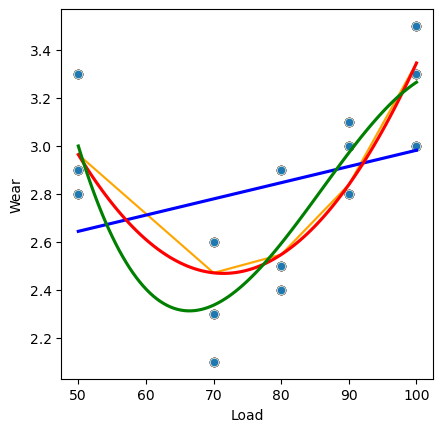

In [17]:
fig=plt.figure(figsize=plt.figaspect(1)*1)
ax=fig.add_subplot(111)
sns.lineplot(x=wear["Load"],y=results2.fittedvalues.values,color="orange")
sns.regplot(x=wear["Load"],y=wear["Wear"],order=1,data=wear,color="blue",ci=None)
sns.regplot(x=wear["Load"],y=wear["Wear"],order=2,data=wear,color="red",ci=None)
sns.regplot(x=wear["Load"],y=wear["Wear"],order=3,data=wear,color="green",ci=None)
sns.scatterplot(x=wear["Load"],y=wear["Wear"],data=wear)